# Case Study 9. Fire Damage

An insurance company wants to predict the damage (in \$000's) to a home
in a particular area if a fire occurs. The damage, and distance from the
fire station were recorded for a random sample of 15 house fires in the
area of interest. They were also particularly interested in predicting
the fire damage to houses that are 1 and 4 miles from the fire station.

The variables measured were:
\begin{align*}
  \texttt{damage} &\quad\quad \textrm{damage (in thousands of dollars)} \\
  \texttt{distance} &\quad\quad \textrm{distance from the fire station (in miles)}
\end{align*}

This dataset is available in the $\texttt{s20x}$ package.

In [1]:
install.packages("s20x")
library(s20x)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

Installing package into '/home/nbuser/R'
(as 'lib' is unspecified)


In [4]:
data(fire.df)
fire.df
#head(fire.df, 5)

distance,damage
3.4,26.2
2.6,19.6
1.8,17.8
4.3,31.3
4.6,31.3
2.1,24.0
2.3,23.1
1.1,17.3
3.1,27.5
6.1,43.2


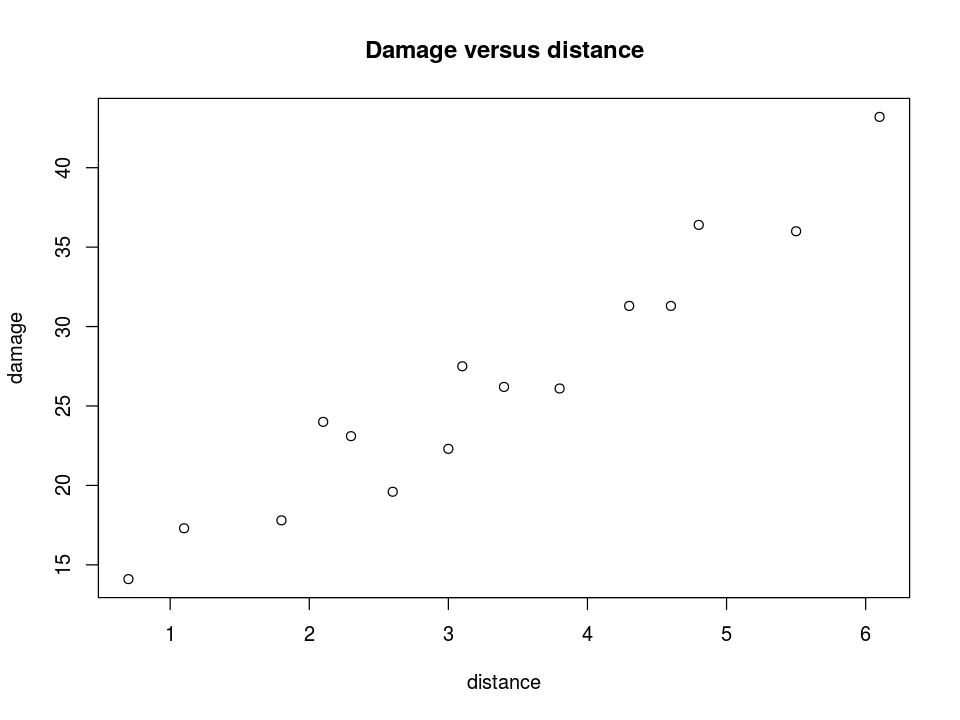

In [5]:
plot(damage ~ distance, main = "Damage versus distance", data = fire.df)

In [7]:
# fit the model
fire.fit = lm(damage ~ distance, data = fire.df)
summary(fire.fit)


Call:
lm(formula = damage ~ distance, data = fire.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4682 -1.4705 -0.1311  1.7915  3.3915 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2779     1.4203   7.237 6.59e-06 ***
distance      4.9193     0.3927  12.525 1.25e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.316 on 13 degrees of freedom
Multiple R-squared:  0.9235,	Adjusted R-squared:  0.9176 
F-statistic: 156.9 on 1 and 13 DF,  p-value: 1.248e-08


In [ ]:
eovcheck(fire.fit)

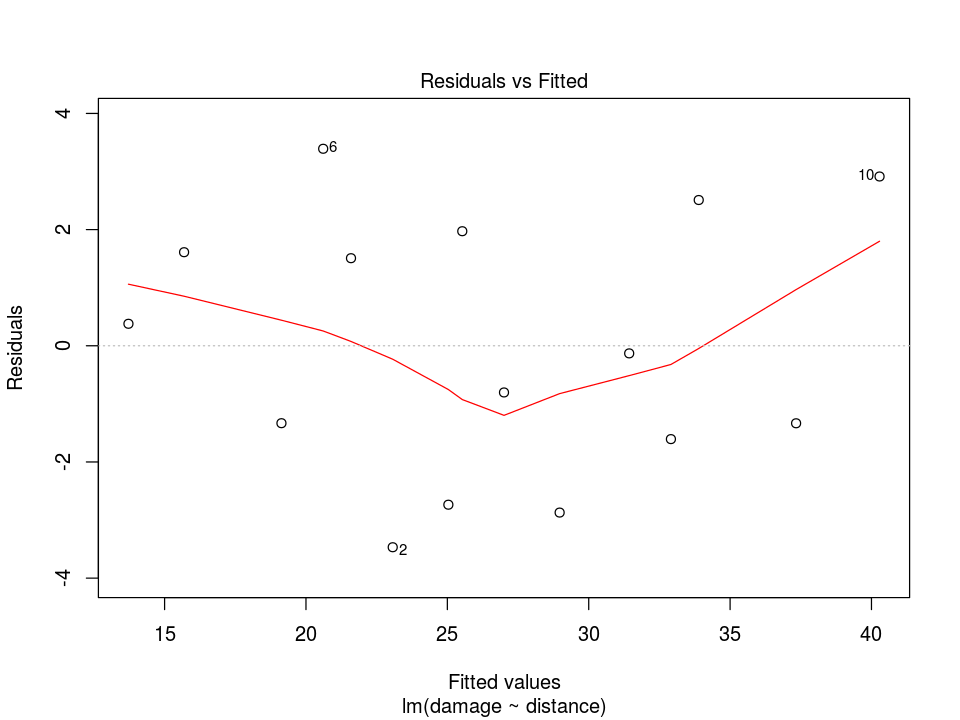

In [8]:
# Alternative to eovcheck (adds trendscatter)
plot(fire.fit, which = 1)

In [ ]:
# Can also do eovcheck(fire.fit, smoother = TRUE) but the line isn't as visible
normcheck(fire.fit)

In [ ]:
cooks20x(fire.fit)

In [ ]:
# Get summary output and confidence intervals
summary(fire.fit)

In [ ]:
confint(fire.fit)

In [ ]:
# Check for effect of dropping observation 10
fire.fit2 <- lm(damage ~ distance, data = fire.df[-10, ])
summary(fire.fit2)

In [ ]:
# Predictions Create a data frame with x-values of interest.
pred.df = data.frame(distance = c(1, 4))
# Want to predict damage of INDIVIDUAL HOUSES, so use prediction intervals.
predict(fire.fit, pred.df, interval = "prediction")

## Method and Assumption Checks

A scatter plot of damage vs distance showed a linear association with
approximately constant scatter and so a linear model was fitted.

The equality of variance, normality and linearity assumptions appear to
be satisfied - a slight trend in the residual plot was observed, but
does not appear to be of major concern. We have a random sample of fires
so the results should be independent of each other.

Observation 10 showed up of concern in the Cooks plot but deleting it
does not change either coefficient by more than 1 standard error so we
retained the observation. (For $\beta_1$ the coefficient changes from
4.9193 to 4.5841; a drop of 0.335 compared to a standard error of
0.3927.) Even if the change was slightly more, the change isn't huge and
there is no reason to doubt the validity of the data point and the
sample size is small, so we'd likely retain the observation. (Rules of
thumb aren't set in stone.)

Our final model is
${\tt damage}_i=\beta_0 +\beta_1\times {\tt distance}_i+\varepsilon_i$
where $\varepsilon_i \overset{\text{iid}}{\sim} N(0,\sigma^2)$.

## Executive Summary

An insurance company wanted to be able to predict the amount of damage
that occurs when a house catches fire. The distance from the fire
station is used to predict the damage.

We find that the further a house is away from a fire station the more
fire damage it suffers.

We estimate that if a house next to a fire station catches fire, the
mean fire damage will be between \$7,200 and \$13,300. We estimate that
for each additional mile from the fire station, the mean fire damage
increases by between \$4,100 and \$5,800.

Our model explains 92% of the variation in house fire damage and should
therefore be a reasonable model for prediction.

Using our model, we predict that if a new fire occurs in a house that is
1 mile from the fire station, the damage will be between \$9,700 and
\$20,700. For a house that is 4 miles from the fire station, we predict
the damage will be between \$24,800 and \$35,200.